In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # reads the images into a array
from tensorflow.keras.optimizers import SGD

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 34.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [6]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [7]:
img_width = 32
img_height = 32
batch_size = 20

In [8]:
datagen = ImageDataGenerator(rescale=1/255)


In [9]:
train_generator = datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height),batch_size=batch_size,classes=['dogs', 'cats'],class_mode='binary')

Found 20000 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'cats': 1, 'dogs': 0}

In [12]:
test_generator = datagen.flow_from_directory(test_data_dir,target_size=(img_width,img_height),batch_size=batch_size,classes=['dogs', 'cats'],class_mode='binary')

Found 5000 images belonging to 2 classes.


In [14]:
len(train_generator) #Batchsize * 1000 i.e 20,000

1000

In [20]:
  model = Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

In [21]:
opt= SGD(learning_rate=0.01,momentum=0.9)

In [22]:
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5, verbose=1, validation_data=test_generator,validation_steps=len(test_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 108s 107ms/step - loss: 0.6990 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.6937 - accuracy: 0.4950 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6936 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 106s 106ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5024


In [24]:
history.history

{'accuracy': [0.5045999884605408,
  0.4950000047683716,
  0.5001500248908997,
  0.498199999332428,
  0.5026000142097473],
 'loss': [0.6989613175392151,
  0.6936575174331665,
  0.6933780312538147,
  0.6936327219009399,
  0.6931818723678589],
 'val_accuracy': [0.5001999735832214, 0.5, 0.5, 0.5, 0.5023999810218811],
 'val_loss': [0.6931709051132202,
  0.6935763955116272,
  0.6936477422714233,
  0.6931515336036682,
  0.693057119846344]}

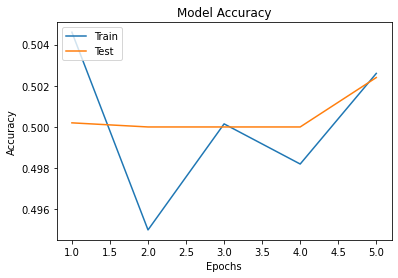

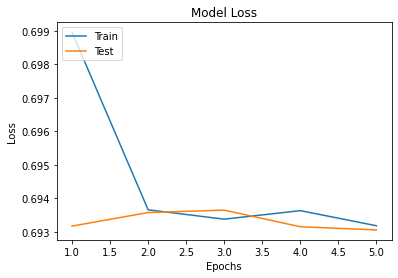

In [27]:
epochs_range = range(1,6)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
  model = Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=128,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=256,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5, verbose=1, validation_data=test_generator,validation_steps=len(test_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 216s 215ms/step - loss: 0.6463 - accuracy: 0.6206 - val_loss: 0.5520 - val_accuracy: 0.7200
Epoch 2/5
1000/1000 [==============================] - 213s 213ms/step - loss: 0.5309 - accuracy: 0.7372 - val_loss: 0.4885 - val_accuracy: 0.7556
Epoch 3/5
1000/1000 [==============================] - 213s 213ms/step - loss: 0.4724 - accuracy: 0.7750 - val_loss: 0.4897 - val_accuracy: 0.7590
Epoch 4/5
1000/1000 [==============================] - 211s 211ms/step - loss: 0.4239 - accuracy: 0.8041 - val_loss: 0.4468 - val_accuracy: 0.7906
Epoch 5/5
1000/1000 [==============================] - 213s 213ms/step - loss: 0.3800 - accuracy: 0.8282 - val_loss: 0.4511 - val_accuracy: 0.7796


In [31]:
history.history

{'accuracy': [0.6206499934196472,
  0.7371500134468079,
  0.7750499844551086,
  0.8040500283241272,
  0.8281999826431274],
 'loss': [0.6463484168052673,
  0.5309126973152161,
  0.47240546345710754,
  0.42388716340065,
  0.3799512982368469],
 'val_accuracy': [0.7200000286102295,
  0.7555999755859375,
  0.7590000033378601,
  0.7906000018119812,
  0.7796000242233276],
 'val_loss': [0.5520191788673401,
  0.4884829521179199,
  0.4896821677684784,
  0.44677168130874634,
  0.4511328637599945]}

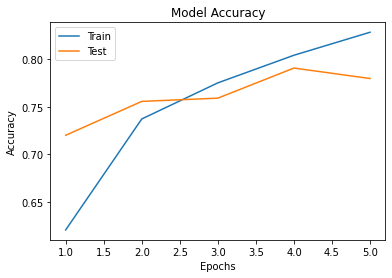

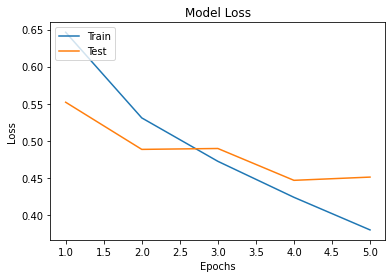

In [32]:
epochs_range = range(1,6)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
  model = Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3),activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(filters=128,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=256,kernel_size=(3,3), strides=(1,1),padding='same',kernel_initializer='he_uniform',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))

In [34]:
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5, verbose=1, validation_data=test_generator,validation_steps=len(test_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 243s 242ms/step - loss: 0.6838 - accuracy: 0.6198 - val_loss: 0.7223 - val_accuracy: 0.6120
Epoch 2/5
1000/1000 [==============================] - 241s 241ms/step - loss: 0.6116 - accuracy: 0.6766 - val_loss: 0.5417 - val_accuracy: 0.7258
Epoch 3/5
1000/1000 [==============================] - 241s 241ms/step - loss: 0.5619 - accuracy: 0.7147 - val_loss: 0.6973 - val_accuracy: 0.6474
Epoch 4/5
1000/1000 [==============================] - 241s 241ms/step - loss: 0.5219 - accuracy: 0.7455 - val_loss: 0.5449 - val_accuracy: 0.7046
Epoch 5/5
1000/1000 [==============================] - 242s 242ms/step - loss: 0.5048 - accuracy: 0.7541 - val_loss: 0.4679 - val_accuracy: 0.7712


In [36]:
history.history

{'accuracy': [0.6197500228881836,
  0.6766499876976013,
  0.7146999835968018,
  0.7454500198364258,
  0.7541499733924866],
 'loss': [0.6838439702987671,
  0.6115714907646179,
  0.5619099140167236,
  0.5218900442123413,
  0.5047922134399414],
 'val_accuracy': [0.6119999885559082,
  0.7257999777793884,
  0.6474000215530396,
  0.7045999765396118,
  0.7712000012397766],
 'val_loss': [0.7222695350646973,
  0.5417362451553345,
  0.6972789764404297,
  0.5448903441429138,
  0.4679329991340637]}

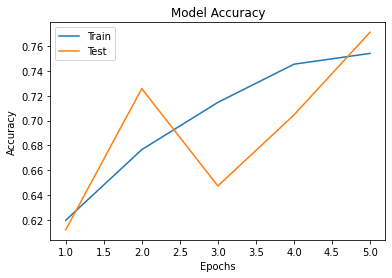

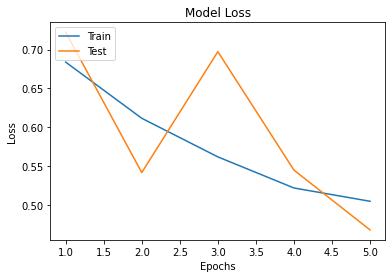

In [37]:
epochs_range = range(1,6)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()